In [1]:

#importing library packages needed for the project

import numpy as np
import pandas as pd
import yfinance as yf
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
# set start and end date parameters for historical data

start_date = pd.to_datetime('2020-01-01')
end_date = pd.to_datetime('2022-12-31')

stock_list = ['AMD', 'AAPL', 'MSFT', 'ORCL'] 

stocks = {} #creating an empty dictionary to store historical key (stock_ticker) and pair (stock_data) values

#storing ajudsted close values for each stock ticker in keys

stocks['AMD'] = yf.download('AMD', start=start_date, end=end_date)[['Adj Close']]
stocks['AAPL'] = yf.download('AAPL', start=start_date, end=end_date)[['Adj Close']]
stocks['MSFT'] = yf.download('MSFT', start=start_date, end=end_date)[['Adj Close']]
stocks['ORCL'] = yf.download('ORCL', start=start_date, end=end_date)[['Adj Close']]

[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


In [ ]:
#inspecting stock_ticker 'AMD'in the stocks dictionary 

stocks['AMD'].head()

#looping through the stock data to calculate normalized returns column for each stock

for stock_ticker, stock_data in stocks.items():
    adj_close = stock_data.get('Adj Close') #to directly get values from the adj close column in the dictionary 

    if adj_close is not None: #prevents index to scaler value error from days where no adj close value exits for a stock_ticker; possibly from no trades within the specified period
        first_adj_close = adj_close.iloc[0] #gets the first adj close value from each stock_ticker
        stock_data['Normalized Returns'] = stock_data['Adj Close'] / first_adj_close #divide each row by the first adj close value to be stored in a new 'normalized returns' column

In [ ]:
#looping through the stocks dictionary to assign a weight of 0.25 to each stock_ticker to create an equal weighted portfolio       
for stock_ticker, stock_data in stocks.items():
    stock_data['Allocation'] = stock_data['Normalized Returns'] * 0.25  

In [ ]:
#looping through the stocks dictionary to assign a portfolio value of $10,000 to the each value in the allocation column
for stock_ticker, stock_data in stocks.items():
    stock_data['Position Value'] = stock_data['Allocation'] * 10000
        

In [6]:
#inspect dictionary to check added columns

stocks['MSFT'].head()


,Adj Close,Normalized Returns,Allocation,Position Value
Date,,,,
2020-01-02,155.422073,1.000000,0.250000,2500.000000
2020-01-03,153.486771,0.987548,0.246887,2468.870208
2020-01-06,153.883484,0.990101,0.247525,2475.251432
2020-01-07,152.480423,0.981073,0.245268,2452.682873
2020-01-08,154.909180,0.996700,0.249175,2491.749987


In [7]:
#looping through the stocks dictionary to create a positional value dictionary for viewing performance

position_values = {}

for stock_ticker, stock_data in stocks.items():
    position_values[stock_ticker] = stock_data['Position Value'] #stores stock_data's positional value values in positional value dictonary

#turning the dictionary into a dataframe to prepare values for plotting

position_values = pd.DataFrame(data=position_values)

#inspecting positional value dataframe

position_values['AAPL'].head()

Date
2020-01-02    2500.000000
2020-01-03    2475.695249
2020-01-06    2495.421715
2020-01-07    2483.685795
2020-01-08    2523.639046
Name: AAPL, dtype: float64

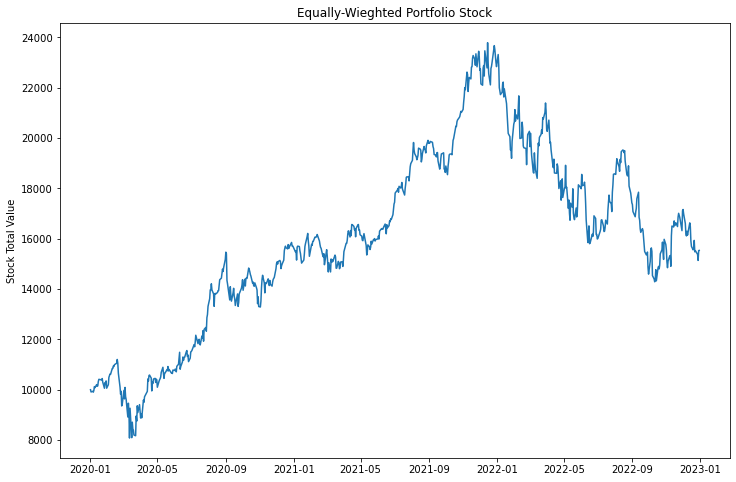

In [8]:
#adding a total column to detail positional value for all the stocks per day

position_values['Total'] = position_values.sum(axis=1)

#plotting the total value of all porfolio stocks with equal weight
        
plt.figure(figsize=(12,8)) #arguments for width and height

plt.plot(position_values['Total'])

plt.title('Equally-Wieghted Portfolio Stock')
plt.ylabel('Stock Total Value');

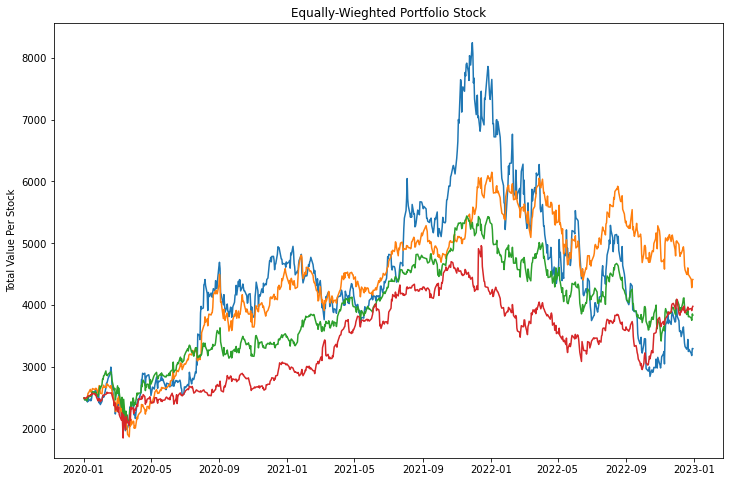

In [9]:
#plotting the total value of each stock per day  

plt.figure(figsize=(12,8))

plt.plot(position_values.iloc[:,0:4]) #plots the position value for each stock from column index 0 - 4

plt.title('Equally-Wieghted Portfolio Stock')
plt.ylabel('Total Value Per Stock');
        

In [10]:
#introducing metrics to further measure the portfolio perfomance 

#cummulative return - calculated by dividing the porfolio end value by the start value
end_value = position_values['Total'][-1]  #derives the portfolio's last position value
start_value = position_values['Total'][0]  #derives the portfolio's first position value
        
cummulative_return = end_value / start_value -1

print("The portfolio's cummulative return is: {}".format(round(cummulative_return*100,2)) + "%") 
       
#daily return - calculated by the portfolio's daily simple returns
position_values['Daily Return'] = position_values['Total'].pct_change()
        
        
#mean daily return - finds the portfolio's average daily return

mean_daily_return = position_values['Daily Return'].mean()

print("The portfolio's mean daily return is: {:.4f}".format(mean_daily_return))

#std daily return - finds the portfolio's average daily return

std_daily_return = position_values['Daily Return'].std()

print("The portfolio's std daily return is: {:.4f}".format(std_daily_return))      

The portfolio's cummulative return is: 55.35%
The portfolio's mean daily return is: 0.0008
The portfolio's std daily return is: 0.0219


In [11]:
#exploring Sharpe Ratio - a risk-adjusted metric that quantifies the expected return on an asset by a given level of risk
#an assest with a higher sharpe ratio when comparing two assets, provides a higher return for the same amount of risk or same
#return for a lower amount of risk

sharpe_ratio = mean_daily_return / std_daily_return #caculated by subtracting the average portfolio return from a risk free rate and divide by the returns standard dev
                                                    #assuming a rfr of 0 here   

In [12]:
#annualizing the sharpe ratio. which is according to the rule of thumb good enough to determine a profitable portfolio    

sharpe_ratio_annualized = sharpe_ratio * 252**0.5 #at least 252 trading days in a year and ^0.5 to find the square root
        

In [13]:
#creating a stock_adj_close dictionary to store adj close values for each stock while looping through the stocks dictionary

stock_adj_close = {}

for stock_ticker, stock_data in stocks.items():
    stock_adj_close[stock_ticker] = stock_data['Adj Close']

#creating a dataframe from the dictionary

stock_adj_close = pd.DataFrame(data=stock_adj_close)

stock_adj_close.head() #to inspect the data frame

#creating dictionary to store adj close returns - a daily percentage change for each stock

stock_returns = stock_adj_close.pct_change()

In [14]:
#building a second portfolio with 10,000 scenarios with optmized (random) weight to determine the best returning asset adjusted for risk

#using np.zeros to create 10,000 weights for 10,000 scenarios

scenarios = 10000 #number of scenarios 

weights_array = np.zeros((scenarios, len(stock_returns.columns))) #creates 10,000 0 weights using the len of columns in stock_returns

In [15]:
#creating other arrays to store our scenario output

returns_array = np.zeros(scenarios)
volatility_array = np.zeros(scenarios)
sharpe_array = np.zeros(scenarios)

In [16]:
import random
random.seed(3)
np.random.seed(3)

#looping through each index in the range of scenarios to create output

for index in range(scenarios): 
    numbers = np.array(np.random.random(4)) #creates an array of four numbers between 0 - 1 in each scenario
    
    weights = numbers / np.sum(numbers) #divide each number by the total of numbers to assign a weight for each stock
    
    weights_array[index,:] = weights #assign the weights to the weights_array index for each scenario
    
    returns_array[index] = np.sum(stock_returns.mean()*252*weights)
    
    volatility_array[index] = np.sqrt(np.dot(weights.T,np.dot(stock_returns.cov()*252,weights)))
    
    sharpe_array[index] = returns_array[index] / volatility_array[index]

In [17]:
#deriving the weight combination and sharpe ratio from the first portfolio scenario

print("The weight combination from the first portfolio scenario is: {}".format(weights_array[0]))
print("The sharpe ratio from the first portfolio scenario is: {}".format(sharpe_array[0]))


The weight combination from the first portfolio scenario is: [0.26728964 0.34364796 0.14116943 0.24789297]
The sharpe ratio from the first portfolio scenario is: 0.6826933184380711


In [18]:
#deriving the highest sharpe ratio from the scenarios and the index

max_sharpe_ratio = sharpe_array.max()
print("The simulation max Sharpe Ratio is: {}".format(max_sharpe_ratio))

index_max_sharpe = sharpe_array.argmax()
print("The simulation max Sharpe ratio is at index: {}".format(index_max_sharpe))


The simulation max Sharpe Ratio is: 0.7541550746038466
The simulation max Sharpe ratio is at index: 9007


In [19]:
#display the optimal weight from the portfolio with the highest sharpe ratio

print(stock_list)
print(weights_array[index_max_sharpe,:])

['AMD', 'AAPL', 'MSFT', 'ORCL']
[0.01360877 0.54730028 0.00540806 0.43368289]


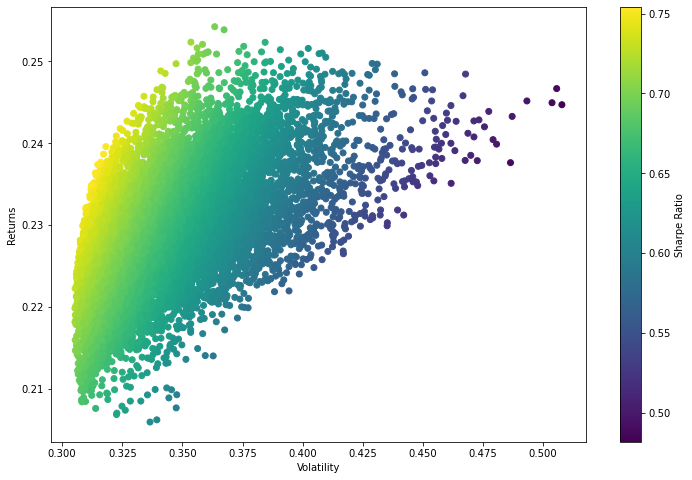

In [20]:
#visualizing the portfolio using a scatter chart that plots returns against volatility

plt.figure(figsize=(12,8))

plt.scatter(x=volatility_array, y=returns_array, c=sharpe_array, cmap='viridis')

plt.colorbar(label='Sharpe Ratio')
plt.xlabel('Volatility')
plt.ylabel('Returns');

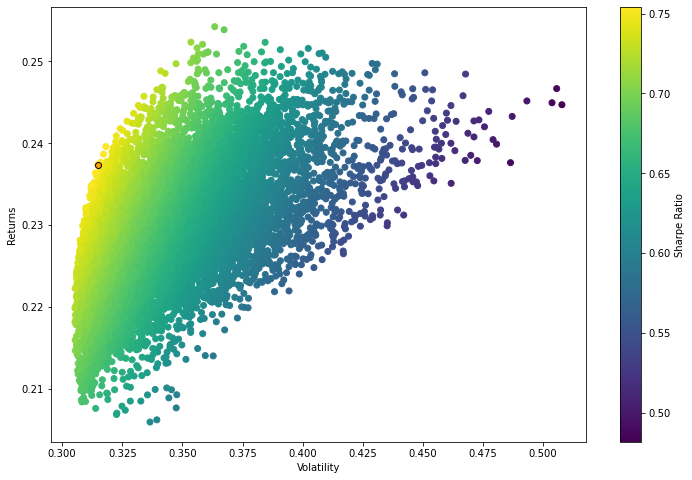

In [21]:
#visualizing the portfolio using a scatter chart that plots returns against volatility; identifying the
#highest sharpe return and highest sharpe volatility

max_sharpe_volatility = volatility_array[index_max_sharpe]
max_sharpe_return = returns_array[index_max_sharpe]

plt.figure(figsize=(12,8))

plt.scatter(x=volatility_array, y=returns_array, c=sharpe_array, cmap='viridis')

plt.colorbar(label='Sharpe Ratio')
plt.xlabel('Volatility')
plt.ylabel('Returns')

plt.scatter(x=max_sharpe_volatility, y=max_sharpe_return, c='orange', edgecolors='black');